Copied this file for testing various models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform, randint

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, make_scorer

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline

!pip install catboost
from catboost import CatBoostClassifier


     |████████████████████████████████| 67.3MB 53kB/s 


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Training Data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Test Data.csv')


In [ ]:
test_data['profession'] = test_data['profession'].apply(lambda word: word.replace(' ', '_'))
test_data['city'] = test_data['city'].apply(lambda word: word.replace(' ', '_'))
test_data['state'] = test_data['state'].apply(lambda word: word.replace(' ', '_'))

In [ ]:
my_score = make_scorer(roc_auc_score,greater_is_better=True)

In [ ]:

df = train_data.copy(True)
df2 = test_data.copy(True)

In [ ]:
df.drop('Id', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)


In [ ]:
# df['married'] = [0*i if df['married'][i]=='single' else 1 for i in range(len(df)) ]
# df['house_ownership'] = [0 if df['house_ownership'][i]=='norent_noown' else 1 if df['house_ownership'][i]=='rented' else -1 for i in range(len(df))]
# df['car_ownership'] = [0 if df['car_ownership'][i]=='no' else 1 for i in range(len(df))]

# df2['married'] = [0*i if df2['married'][i]=='single' else 1 for i in range(len(df2)) ]
# df2['house_ownership'] = [0 if df2['house_ownership'][i]=='norent_noown' else 1 if df2['house_ownership'][i]=='rented' else -1 for i in range(len(df2))]
# df2['car_ownership'] = [0 if df2['car_ownership'][i]=='no' else 1 for i in range(len(df2))]



In [ ]:
# default_by_prof = df[df['risk_flag']==1]['profession'].value_counts()
# (default_by_prof/ df['profession'].value_counts()).sort_values()

In [ ]:
# default_by_city = df[df['risk_flag']==1]['city'].value_counts()
# #(default_by_city/ df['city'].value_counts()).sort_values(ascending=False)[:25]
# #default_by_city.sort_values(ascending=False)[:25]
# default_by_city

In [ ]:
# default_by_state = df[df['risk_flag']==1]['state'].value_counts()
# (default_by_state/ df['state'].value_counts()).sort_values(ascending=False)
# #default_by_city.sort_values(ascending=False)[:25]
# #default_by_state

In [ ]:
#default_by_houseYrs = df[df['risk_flag']==1]['current_house_years'].value_counts()
#(default_by_home/ df['home_ownership'].value_counts()).sort_values(ascending=False)
#default_by_city.sort_values(ascending=False)[:25]
#df['current_house_years'].value_counts()

In [ ]:
# plt.figure(figsize=(40,6))
# sns.countplot(x='state', data=df, hue='risk_flag')

In [ ]:
num_feat = df.select_dtypes(include='number').columns.tolist()[:-1]
cat_feat = df.select_dtypes(exclude='number').columns.tolist()
target_feat = df.select_dtypes(include='number').columns.tolist()[-1]

Y_ready = df[target_feat].values

# transformer = ColumnTransformer([
#                               ('encoding','passthrough' ,cat_feat),
#                               ('scaling', 'passthrough', num_feat),                              
#                               ], remainder='passthrough')

print(num_feat)
print(cat_feat)
print(target_feat)



['income', 'age', 'experience', 'current_job_years', 'current_house_years']
['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']
risk_flag


In [ ]:
# df = transformer.fit_transform(df.iloc[:,:-1])
# df2 = transformer.transform(df2)


In [ ]:
#df = df.astype('category')
# df2 = df2.astype('category')

In [ ]:
X_ready = df.iloc[:,:-1]
X_test = df2

X_train, X_val, y_train, y_val = train_test_split(X_ready, Y_ready, test_size=0.15,stratify=Y_ready)



print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('\n')
print('X_val shape :', X_val.shape)
print('y_val shape :', y_val.shape)
print('\n')
print('X_test shape :', X_test.shape)





X_train shape : (214200, 11)
y_train shape : (214200,)


X_val shape : (37800, 11)
y_val shape : (37800,)


X_test shape : (28000, 11)


$\textbf{CatBoost}$

itr=700 , balanced , Train : 91.434 , Val : 88.1544

itr=700 , balanced , Train : 91.5624 , Val : 88.2490

itr=1000 , balanced , Train : 91.5624 , Val : 88.294

itr=2000 , balanced , Train : 91.3761 , Val : 88.3367

itr=5000 , balanced , Train : 91.3287 , Val : 88.44716

itr=1000 , balanced , learning = 0.2, Train : 88.46 , Val : 87.61



In [ ]:
model = CatBoostClassifier(iterations=4000,
                           auto_class_weights='Balanced',
                           #depth=10,
                           learning_rate = 0.05,
                           task_type = 'GPU',
                           #random_seed=42,
                           #l2_leaf_reg = 6,
                           #leaf_estimation_method =,
                           #bagging_temperature = ,
                           #one_hot_max_size = 40 ,
                           cat_features= [1,2,3,4,5,6,7,8,9,10],                       
                           verbose=1,
                           #rsm = 0.75
                           )


model.fit(X_train,
          y_train,
          cat_features= [1,2,3,4,5,6,7,8,9,10],
          )

0:	learn: 0.6369232	total: 46.5ms	remaining: 3m 5s
1:	learn: 0.5871237	total: 93.6ms	remaining: 3m 7s
2:	learn: 0.5467245	total: 143ms	remaining: 3m 9s
3:	learn: 0.5109557	total: 190ms	remaining: 3m 9s
4:	learn: 0.4820018	total: 237ms	remaining: 3m 9s
5:	learn: 0.4574732	total: 278ms	remaining: 3m 4s
6:	learn: 0.4373415	total: 314ms	remaining: 2m 59s
7:	learn: 0.4185476	total: 358ms	remaining: 2m 58s
8:	learn: 0.4013487	total: 394ms	remaining: 2m 54s
9:	learn: 0.3886990	total: 429ms	remaining: 2m 51s
10:	learn: 0.3780720	total: 460ms	remaining: 2m 46s
11:	learn: 0.3672398	total: 494ms	remaining: 2m 44s
12:	learn: 0.3598042	total: 528ms	remaining: 2m 41s
13:	learn: 0.3529718	total: 557ms	remaining: 2m 38s
14:	learn: 0.3453068	total: 587ms	remaining: 2m 35s
15:	learn: 0.3403070	total: 617ms	remaining: 2m 33s
16:	learn: 0.3357860	total: 648ms	remaining: 2m 31s
17:	learn: 0.3318852	total: 677ms	remaining: 2m 29s
18:	learn: 0.3280933	total: 712ms	remaining: 2m 29s
19:	learn: 0.3243987	total

In [ ]:
print(roc_auc_score(y_train, model.predict(X_train)))
roc_auc_score(y_val, model.predict(X_val))

0.8739860146378178


0.8949850660527584

In [ ]:
model.feature_importances_


array([ 1.41419958, 20.3368355 ,  5.65058896,  1.34617351,  3.36753343,
        2.39800536, 17.41975455, 32.03194414, 12.51636948,  2.37287052,
        1.14572497])

<BarContainer object of 11 artists>

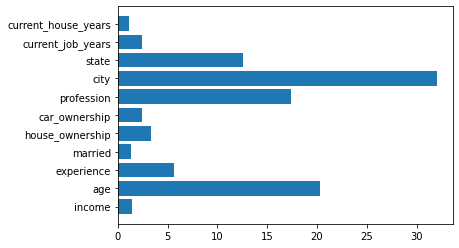

In [ ]:
plt.barh(X_train.columns, model.feature_importances_)

In [ ]:
z = zip(model.feature_importances_ ,X_train.columns)

sorted_feat_imp = list(zip(*sorted(z)))
sorted_feat_imp

<BarContainer object of 11 artists>

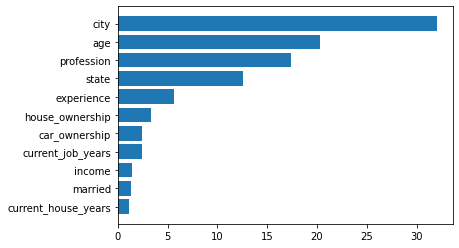

In [ ]:
plt.barh(sorted_feat_imp[1], sorted_feat_imp[0])

In [ ]:
# # param_cat = {
# #             'iterations' : [2000],
# #              'depth' : [2,3,4,5,6,7,8],
# #              'learning_rate' :[0.01,0.05,0.1,0.15,0.2,0.25]
             
# #             }

# scores_cat = []

# for depth in [2,4,6,8]:
#   for lr in [0.01, 0.05, 0.1, 0.15]:
#     model = CatBoostClassifier(
#                                iterations=3000,
#                                depth = depth,
#                                learning_rate = lr,
#                                cat_features= list(np.arange(11)),
#                                auto_class_weights='Balanced',
#                                task_type = 'GPU',   
#                                verbose= 0                          
#                                )
#     model.fit(X_train,y_train,cat_features= list(np.arange(11)))
#     print('depth = {}, lr = {} and test accuracy :'.format(depth,lr), roc_auc_score(y_val, model.predict(X_val)) )
#     scores_cat.append(roc_auc_score(y_val, model.predict(X_val)))



In [ ]:
# # param_cat = {
# #             'iterations' : [2000],
# #              'depth' : [2,3,4,5,6,7,8],
# #              'learning_rate' :[0.01,0.05,0.1,0.15,0.2,0.25]
             
# #             }

# scores_cat = []

# for depth in [2,4,6,8]:
#   for lr in [0.01, 0.05, 0.1, 0.15]:
#     model = CatBoostClassifier(
#                                iterations=5000,
#                                depth = depth,
#                                learning_rate = 0.01,
#                                cat_features= list(np.arange(11)),
#                                auto_class_weights='Balanced',
#                                task_type = 'GPU',   
#                                verbose= 0                          
#                                )
#     model.fit(X_train,y_train,cat_features= list(np.arange(11)))
#     print('depth = {}, lr = {} and test accuracy :'.format(depth,lr), roc_auc_score(y_val, model.predict(X_val)) )
#     scores_cat.append(roc_auc_score(y_val, model.predict(X_val)))



In [ ]:
y_predic_catboost = pd.DataFrame(model.predict(X_test))
y_predic_catboost['id'] = test_data['id']
y_predic_catboost.columns = ['risk_flag', 'id']
y_predic_catboost[['id', 'risk_flag']].to_csv('y_predict_catboost_itr700_8921.csv',index=False)


REmoving the least important columns from the data set and fitting the model again.
